In [1]:
!pip install fastai

In [2]:
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.PETS)

In [4]:
def is_cat(x) : return x[0].isupper()

In [5]:
dls = ImageDataLoaders.from_name_func(
path, get_image_files(path), valid_pct=0.2, seed=42,
label_func = is_cat, item_tfms=Resize(224))

In [7]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

In [8]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.378918,0.291347,0.112314,17:29


epoch,train_loss,valid_loss,error_rate,time
0,0.237865,0.177024,0.078484,21:21


In [9]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
path, bs=8, fnames = get_image_files(path/"images"),
label_func = lambda o: path/"labels"/f"{o.stem}_P{o.suffix}",
codes = np.loadtxt(path/"codes.txt", dtype=str))
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.730626,3.859479,00:16


epoch,train_loss,valid_loss,time
0,2.079842,1.618892,00:18
1,1.739935,1.623903,00:18
2,1.552284,1.195036,00:19
3,1.380192,1.050015,00:19
4,1.233045,0.927508,00:19
5,1.101103,0.901448,00:19
6,0.994662,0.862121,00:19
7,0.912661,0.857047,00:19


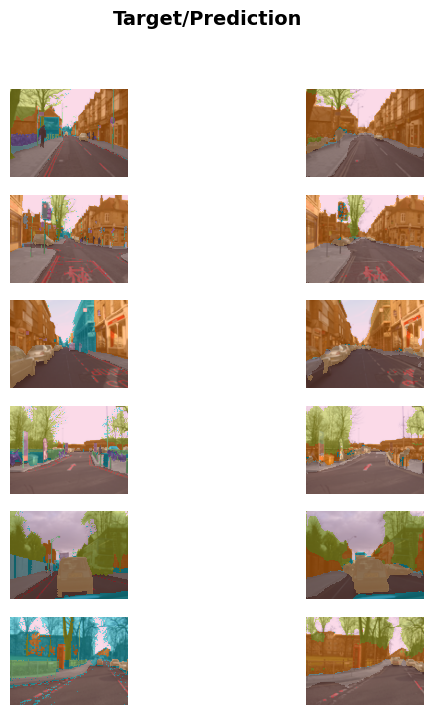

In [10]:
learn.show_results(max_n = 6, figsize = (7,8))

In [14]:
from fastai.text.all import *



In [25]:
source = untar_data(URLs.IMDB)

In [31]:
dls = TextDataLoaders.from_folder(source, valid="test")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\YES\\.fastai\\data\\imdb_tok\\counter.pkl'

In [33]:
doc(learn.predict)

Learner.predict(item, rm_type_tfms=None, with_input=False)
Prediction on `item`, fully decoded, loss function decoded and probabilities

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


In [34]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)
dls = TabularDataLoaders.from_csv(path/"adult.csv", path=path, y_names = "salary", 
                                 cat_names = ["workclass", "education", "marital-status", "occupation", "relationship", "race"],
                                 cont_names = ["age", "fnlwgt", "education-num"],
                                 procs = [Categorify, FillMissing, Normalize])
learn = tabular_learner(dls, metrics=accuracy)

In [35]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.388420,0.366508,0.830313,00:02
1,0.353730,0.358181,0.835381,00:02
2,0.352480,0.353582,0.835074,00:02


In [37]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/"ratings.csv")
learn=collab_learner(dls, y_range=(0.5, 5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.490290,1.435967,00:00


epoch,train_loss,valid_loss,time
0,1.363536,1.375359,00:00
1,1.276318,1.193418,00:00
2,1.031846,0.875185,00:00
3,0.810742,0.719648,00:00
4,0.695033,0.677061,00:00
5,0.651171,0.664266,00:00
6,0.634193,0.657668,00:00
7,0.619270,0.655212,00:00
8,0.611989,0.654374,00:00
9,0.614823,0.654277,00:00


In [38]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,75.0,43.0,5.0,3.876123
1,48.0,51.0,3.0,4.544385
2,23.0,38.0,4.0,3.625464
3,71.0,53.0,3.0,4.525229
4,14.0,54.0,4.0,3.811932
5,21.0,67.0,3.5,3.506706
6,18.0,31.0,4.0,3.739044
7,26.0,78.0,3.5,3.277250
8,42.0,54.0,4.0,3.705758
